In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
pip install qiskit 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import qiskit 
from qiskit import QuantumCircuit 
from qiskit.circuit.library import UnitaryGate 

In [4]:
#  phase oracle defining here 

def phase_oracle(n, marked): 
    qc=QuantumCircuit(n, name="phase_oracle")
    identity=np.identity(2**n)
    for elem in marked: 
        identity[elem, elem]=-1
    gate=UnitaryGate(identity)
    qc.append(gate, range(n))
    return qc 

In [5]:
def grover_iteration(n, marked): 
    qc=QuantumCircuit(n, name="Grover_Iteration") 
    # actual oracle 
    qc.append(phase_oracle(n, marked), range(n))
    qc.h(range(n)) 
    # conditional phase shift 
    qc.append(phase_oracle(n, [0]), range(n))
    qc.h(range(n))
    return qc 

In [6]:
def GroversAlgo(n, marked): 
    qc=QuantumCircuit(n, n) 
    # r=some complex shit to be derived  
    theta=2*np.arccos((2**n-len(marked))/(np.sqrt(2**n)*np.sqrt(2**n-len(marked))))
    r=int(-1/2+np.pi/(2*theta)) 
    print(r) 
    print(theta)
    qc.h(range(n))
    for i in range(r): 
        qc.append(grover_iteration(n, marked), range(n))
    # performing the measurement. High Prob we get the solution to search problem 
    for i in range(n): 
        qc.measure(i, i)
    return qc 

In [7]:
marked=[5]
qc=GroversAlgo(10, marked) 
qc.draw()

24
0.06251017699898875


┌───┐┌───────────────────┐┌───────────────────┐┌───────────────────┐»
 q_0: ┤ H ├┤0                  ├┤0                  ├┤0                  ├»
      ├───┤│                   ││                   ││                   │»
 q_1: ┤ H ├┤1                  ├┤1                  ├┤1                  ├»
      ├───┤│                   ││                   ││                   │»
 q_2: ┤ H ├┤2                  ├┤2                  ├┤2                  ├»
      ├───┤│                   ││                   ││                   │»
 q_3: ┤ H ├┤3                  ├┤3                  ├┤3                  ├»
      ├───┤│                   ││                   ││                   │»
 q_4: ┤ H ├┤4                  ├┤4                  ├┤4                  ├»
      ├───┤│  Grover_Iteration ││  Grover_Iteration ││  Grover_Iteration │»
 q_5: ┤ H ├┤5                  ├┤5                  ├┤5                  ├»
      ├───┤│                   ││                   ││                   │»
 q_6: ┤ H ├┤6                  ├┤6                  ├┤6                  ├»
      ├───┤│                   ││                   ││                   │»
 q_7: ┤ H ├┤7                  ├┤7                  ├┤7                  ├»
      ├───┤│                   ││                   ││                   │»
 q_8: ┤ H ├┤8                  ├┤8                  ├┤8                  ├»
      ├───┤│                   ││                   ││                   │»
 q_9: ┤ H ├┤9                  ├┤9                  ├┤9                  ├»
      └───┘└───────────────────┘└───────────────────┘└───────────────────┘»
c: 10/════════════════════════════════════════════════════════════════════»
                                                                          »
«      ┌───────────────────┐┌───────────────────┐┌───────────────────┐»
« q_0: ┤0                  ├┤0                  ├┤0                  ├»
«      │                   ││                   ││                   │»
« q_1: ┤1                  ├┤1                  ├┤1                  ├»
«      │                   ││                   ││                   │»
« q_2: ┤2                  ├┤2                  ├┤2                  ├»
«      │                   ││                   ││                   │»
« q_3: ┤3                  ├┤3                  ├┤3                  ├»
«      │                   ││                   ││                   │»
« q_4: ┤4                  ├┤4                  ├┤4                  ├»
«      │  Grover_Iteration ││  Grover_Iteration ││  Grover_Iteration │»
« q_5: ┤5                  ├┤5                  ├┤5                  ├»
«      │                   ││                   ││                   │»
« q_6: ┤6                  ├┤6                  ├┤6                  ├»
«      │                   ││                   ││                   │»
« q_7: ┤7                  ├┤7                  ├┤7                  ├»
«      │                   ││                   ││                   │»
« q_8: ┤8                  ├┤8                  ├┤8                  ├»
«      │                   ││                   ││                   │»
« q_9: ┤9                  ├┤9                  ├┤9                  ├»
«      └───────────────────┘└───────────────────┘└───────────────────┘»
«c: 10/═══════════════════════════════════════════════════════════════»
«                                                                     »
«      ┌───────────────────┐┌───────────────────┐┌───────────────────┐»
« q_0: ┤0                  ├┤0                  ├┤0                  ├»
«      │                   ││                   ││                   │»
« q_1: ┤1                  ├┤1                  ├┤1                  ├»
«      │                   ││                   ││                   │»
« q_2: ┤2                  ├┤2                  ├┤2                  ├»
«      │                   ││                   ││                   │»
« q_3: ┤3                  ├┤3                  ├┤3                  ├»
«      │                  

In [8]:
pip install qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 66.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [9]:
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram

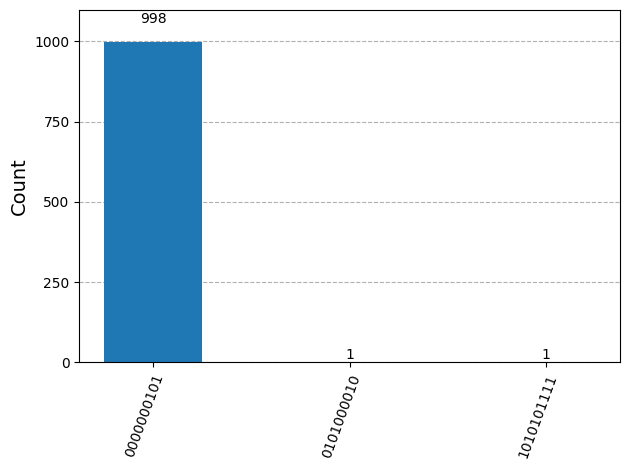

In [10]:
sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled, shots=1000).result()
counts = result.get_counts()
plot_histogram(counts)

In [11]:
#  running on IBMQQ -> to be learned 